In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
df= pd.read_csv('NFLX.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [6]:
df.shape

(1009, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [9]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
new_df=pd.read_csv('NFLX.csv',parse_dates=['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [14]:
new_df['Date']=pd.to_datetime(new_df['Date'],errors='coerce')
print(type(new_df.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [15]:
new_df.sort_values(by=['Date'],inplace=True,ascending=True)
new_df.Date.head()

0   2018-02-05
1   2018-02-06
2   2018-02-07
3   2018-02-08
4   2018-02-09
Name: Date, dtype: datetime64[ns]

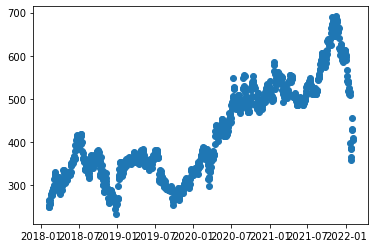

In [16]:
fig,ax=plt.subplots()
ax.scatter(new_df.Date,new_df.Close)

In [17]:
new_df.reset_index(inplace=True)
new_df

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...,...
1004,1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [18]:
close_df=new_df['Close']
close_df

0       254.259995
1       265.720001
2       264.559998
3       250.100006
4       249.470001
           ...    
1004    427.140015
1005    457.130005
1006    429.480011
1007    405.600006
1008    410.170013
Name: Close, Length: 1009, dtype: float64

In [19]:
close_df.size

1009

In [20]:
close_df.shape

(1009,)

In [22]:
close_df.describe()

count    1009.000000
mean      419.000733
std       108.289999
min       233.880005
25%       331.619995
50%       378.670013
75%       509.079987
max       691.690002
Name: Close, dtype: float64

In [25]:
scaler=MinMaxScaler(feature_range=(0,1))
close_df=scaler.fit_transform(np.array(close_df).reshape(-1,1))
close_df

array([[0.04451626],
       [0.06954849],
       [0.06701469],
       ...,
       [0.4272515 ],
       [0.37509011],
       [0.38507243]])

In [26]:
training_size=int(len(close_df)*0.7)
test_size=len(close_df)-training_size
train_data,test_data=close_df[0:training_size,:],close_df[training_size:len(close_df),:1]

In [27]:
train_data.shape,close_df.shape

((706, 1), (1009, 1))

In [28]:
test_data.shape

(303, 1)

In [29]:
type(test_data)

numpy.ndarray

In [30]:
def create_dataset(dataset,time_step=1):
    dataA=[]
    dataB=[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataA.append(a)
        dataB.append(dataset[i+time_step,0])
    return np.array(dataA), np.array(dataB)
time_step=100
A_train,b_train= create_dataset(train_data,time_step)
A_test,B_test=create_dataset(test_data,time_step)

In [31]:
A_test,B_test=create_dataset(test_data,time_step)

In [32]:
b_train.shape

(605,)

In [33]:
A_train.shape

(605, 100)

In [34]:
print(A_test.shape), print(B_test.shape)

(202, 100)
(202,)


(None, None)

In [35]:
A_train=A_train.reshape(A_train.shape[0],A_train.shape[1],1)
A_test=A_test.reshape(A_test.shape[0],A_test.shape[1],1)
 

In [42]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))#input layer with 50 neurons
model.add(LSTM(50,return_sequences=True)) #hidden layers with 50 neurons
model.add(LSTM(50))
model.add(Dense(1))#output layer
model.compile(loss='mean_squared_error',optimizer='adam')
 

In [43]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics='acc')

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_5 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_6 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
model.fit(A_train, b_train, validation_data = (A_test, B_test), epochs =100, batch_size = 64, verbose = 1);

Epoch 1/100
10/10 [==============================] - 9s 369ms/step - loss: 0.0358 - acc: 0.0017 - val_loss: 0.0239 - val_acc: 0.0050
Epoch 2/100
10/10 [==============================] - 2s 230ms/step - loss: 0.0089 - acc: 0.0017 - val_loss: 0.0244 - val_acc: 0.0050
Epoch 3/100
10/10 [==============================] - 2s 250ms/step - loss: 0.0057 - acc: 0.0017 - val_loss: 0.0196 - val_acc: 0.0050
Epoch 4/100
10/10 [==============================] - 2s 238ms/step - loss: 0.0042 - acc: 0.0017 - val_loss: 0.0108 - val_acc: 0.0050
Epoch 5/100
10/10 [==============================] - 2s 247ms/step - loss: 0.0035 - acc: 0.0017 - val_loss: 0.0097 - val_acc: 0.0050
Epoch 6/100
10/10 [==============================] - 2s 238ms/step - loss: 0.0032 - acc: 0.0017 - val_loss: 0.0093 - val_acc: 0.0050
Epoch 7/100
10/10 [==============================] - 2s 230ms/step - loss: 0.0031 - acc: 0.0017 - val_loss: 0.0108 - val_acc: 0.0050
Epoch 8/100
10/10 [==============================] - 2s 230ms/step - 

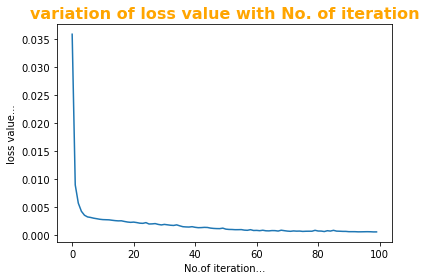

In [46]:
loss=model.history.history['loss']
plt.plot(loss)
plt.xlabel("No.of iteration...")
plt.ylabel("loss value...")
plt.title("variation of loss value with No. of iteration",color="orange",fontsize=16,fontweight="bold");


In [47]:
train_predict1=model.predict(A_train)

19/19 [==============================] - 2s 36ms/step


In [48]:
test_predict1=model.predict(A_test)

7/7 [==============================] - 0s 38ms/step


In [49]:
train_predict1=scaler.inverse_transform(train_predict1)
test_predict1=scaler.inverse_transform(test_predict1)

In [51]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(b_train,train_predict1))


378.1943243266416

In [53]:
math.sqrt(mean_squared_error(B_test,test_predict1))

553.0007391586671

In [54]:
close_df

array([[0.04451626],
       [0.06954849],
       [0.06701469],
       ...,
       [0.4272515 ],
       [0.37509011],
       [0.38507243]])

In [55]:
train_predict1.shape

(605, 1)

In [56]:
look_back=100
trainPredictPlot = np.empty_like(close_df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict1)+look_back, :] = train_predict1

# shift test predictions for plotting
testPredictPlot = np.empty_like(close_df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict1)+(look_back*2)+1:len(df)-1, :] = test_predict1

Text(0, 0.5, 'closing price')

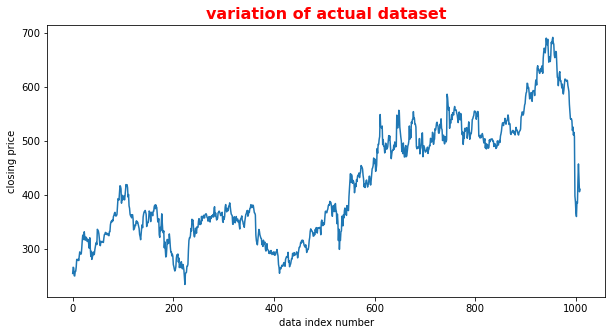

In [61]:
plt.figure(figsize=(10,5))
plt.plot(scaler.inverse_transform(close_df))
plt.title("variation of actual dataset",color="red",fontsize=16,fontweight="bold")
plt.xlabel("data index number")
plt.ylabel("closing price")

Text(0, 0.5, 'closing price')

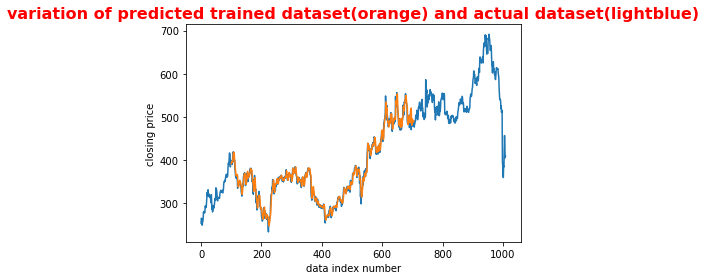

In [60]:
plt.plot(scaler.inverse_transform(close_df))
plt.plot(trainPredictPlot)
plt.title("variation of predicted trained dataset(orange) and actual dataset(lightblue)",color="red",fontsize=16,fontweight="bold")
plt.xlabel("data index number")
plt.ylabel("closing price")

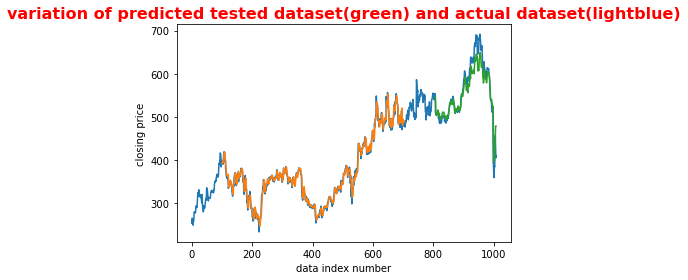

In [62]:
plt.plot(scaler.inverse_transform(close_df))
plt.plot(trainPredictPlot)
plt.title("variation of predicted tested dataset(green) and actual dataset(lightblue)",color="red",fontsize=16,fontweight="bold")
plt.xlabel("data index number")
plt.ylabel("closing price")
plt.plot(testPredictPlot)
plt.show()